### Energy production in Finland

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from google.colab import drive
from itertools import cycle
import numpy as np
import statistics
from datetime import datetime
from prophet import Prophet
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def plot_graph(df, col_cycle):
    fig = px.line()
    for n, d in enumerate(df):
      color =  next(col_cycle)
      fig.add_scatter(x=df['Start time UTC+02:00'], y=df["value"], line_dash="solid", line_color=color, name=f"series {n+1}")
    fig.show()

In [ ]:
df_prod = pd.read_csv("/content/drive/MyDrive/Junction 2022/dataset/Electricity production in Finland.csv")
df_prod = df_prod[['Start time UTC+02:00', 'Electricity production in Finland']]
df_prod["Start time UTC+02:00"]= pd.to_datetime(df_prod["Start time UTC+02:00"])

In [ ]:
df_prod.tail()

Start time UTC+02:00  Electricity production in Finland
42465  2022-11-05 07:00:00                             6940.0
42466  2022-11-05 08:00:00                             7166.0
42467  2022-11-05 09:00:00                             7251.0
42468  2022-11-05 10:00:00                             7445.0
42469  2022-11-05 11:00:00                             7508.0

In [ ]:
col_cycle = cycle(px.colors.qualitative.Alphabet)
mean__prod_finland = round(df_prod['Electricity production in Finland'].mean(),2)
print(f'Total mean: {mean__prod_finland} MWh/h')

df_year_p = df_prod.groupby(df_prod['Start time UTC+02:00'].dt.year)    
df_year_p = [df_year_p.get_group(x) for x in df_year_p.groups]
for d in df_year_p:
  d = d.rename(columns={'Electricity production in Finland': 'value'})
  mean__prod_finland_year = round(d['value'].mean(),2)
  plot_graph(d, col_cycle)
  print(f'Year mean {d["Start time UTC+02:00"].dt.year.iloc[0]} production: {mean__prod_finland_year} MWh/h')

Total mean: 7448.76 MWh/h


Year mean 2018 production: 7561.09 MWh/h


Year mean 2019 production: 7283.88 MWh/h


Year mean 2020 production: 7256.1 MWh/h


Year mean 2021 production: 7681.03 MWh/h


Year mean 2022 production: 7464.9 MWh/h


### Electricity consuption in Finland

In [ ]:
df_cons = pd.read_csv("/content/drive/MyDrive/Junction 2022/dataset/Electricity consumption in Finland.csv")
df_cons = df_cons[['Start time UTC+02:00', 'Electricity consumption in Finland']]
df_cons["Start time UTC+02:00"]= pd.to_datetime(df_cons["Start time UTC+02:00"])

In [ ]:
df_cons.tail()

Start time UTC+02:00  Electricity consumption in Finland
42808  2022-11-05 07:00:00                              8591.0
42809  2022-11-05 08:00:00                              8686.0
42810  2022-11-05 09:00:00                              8880.0
42811  2022-11-05 10:00:00                              9068.0
42812  2022-11-05 11:00:00                              9095.0

In [ ]:
mean_cons_finland = round(df_cons['Electricity consumption in Finland'].mean(),2)
print(f'Total mean: {mean_cons_finland} MWh/h')

df_year_c = df_cons.groupby(df_cons['Start time UTC+02:00'].dt.year)    
df_year_c = [df_year_c.get_group(x) for x in df_year_c.groups]
for d in df_year_c:
  d = d.rename(columns={'Electricity consumption in Finland': 'value'})
  plot_graph(d, col_cycle)
  mean_cons_finland_year = round(d['value'].mean(),2)
  print(f'Year mean {d["Start time UTC+02:00"].dt.year.iloc[0]} consumption: {mean_cons_finland_year} MWh/h')

Total mean: 9363.36 MWh/h


Year mean 2018 consumption: 9791.72 MWh/h


Year mean 2019 consumption: 9482.62 MWh/h


Year mean 2020 consumption: 8916.45 MWh/h


Year mean 2021 consumption: 9669.65 MWh/h


Year mean 2022 consumption: 8879.06 MWh/h


#### Electricity consumption in a example day

In [ ]:
df_cons = pd.read_csv("/content/drive/MyDrive/Junction 2022/dataset/Electricity consumption in Finland.csv")
df_cons = df_cons[['Start time UTC+02:00', 'Electricity consumption in Finland']]
df_cons["Start time UTC+02:00"]= pd.to_datetime(df_cons["Start time UTC+02:00"])

In [ ]:
df_cons[df_cons['Electricity consumption in Finland']==df_cons['Electricity consumption in Finland'].max()]

Start time UTC+02:00  Electricity consumption in Finland
9414  2019-01-28 08:00:00                             14542.0

In [ ]:
day_h_start = '2021-02-18 00:00:00'
day_h_end = '2021-02-18 23:00:00'
df_day = df_cons.loc[(df_cons["Start time UTC+02:00"] >= datetime.strptime(day_h_start, "%Y-%m-%d %H:%M:%S")) & (df_cons["Start time UTC+02:00"] <= datetime.strptime(day_h_end, "%Y-%m-%d %H:%M:%S"))]
df_day = df_day.rename(columns={'Electricity consumption in Finland': 'value'})

fig = px.line()
fig.add_scatter(x=df_day["Start time UTC+02:00"], y=df_day["value"], line_dash="solid", line_color='red', name="series")
fig.show()

df_day.to_csv('electricity_cons_day_18_Feb_2021.csv')

### PRICES FOR CONSUMPTION

In [ ]:
prices_year = [0.0917, 0.0971, 0.0880, 0.0852, 0.1945]
n = 0
prices_usage = {}
df_year_c = df_cons.groupby(df_cons['Start time UTC+02:00'].dt.year)    
df_year_c = [df_year_c.get_group(x) for x in df_year_c.groups]
for d in df_year_c:
  d = d.rename(columns={'Electricity consumption in Finland': 'value'})
  mean_cons_finland_year = round(d['value'].mean(),2)
  prices_finland_year = round(mean_cons_finland_year * float(prices_year[n] / 1000),2)
  prices_usage[d["Start time UTC+02:00"].iloc[0]] = prices_finland_year
  print(f'Year prices usage {d["Start time UTC+02:00"].dt.year.iloc[0]}: {prices_finland_year} € per MWh/h')
  n += 1


prices_usage = pd.DataFrame.from_dict(prices_usage, orient="index").reset_index()
prices_usage = prices_usage.rename(columns={'index':'year', 0:'value'})

fig = px.line()
fig.add_scatter(x=prices_usage['year'], y=prices_usage["value"], line_dash="solid", line_color='red', name="series")
fig.show()

Year prices usage 2018: 0.9 € per MWh/h
Year prices usage 2019: 0.92 € per MWh/h
Year prices usage 2020: 0.78 € per MWh/h
Year prices usage 2021: 0.82 € per MWh/h
Year prices usage 2022: 1.73 € per MWh/h


### DELTA consumption / production

In [ ]:
delta_finland = round(mean_cons_finland - mean__prod_finland, 2)
print(f'Total delta: {delta_finland} MWh/h')

for d, c in zip(df_year_p, df_year_c):
  mean_cons_finland_year = round(c['Electricity consumption in Finland'].mean(),2)
  mean__prod_finland_year = round(d['Electricity production in Finland'].mean(),2)
  delta_finland_year = round(mean_cons_finland_year - mean__prod_finland_year,2) 
  print(f'Year delta {d["Start time UTC+02:00"].dt.year.iloc[0]}: {delta_finland_year} MWh/h')

Total delta: 1914.6 MWh/h
Year delta 2018: 2230.63 MWh/h
Year delta 2019: 2198.74 MWh/h
Year delta 2020: 1660.35 MWh/h
Year delta 2021: 1988.62 MWh/h
Year delta 2022: 1414.16 MWh/h


### PERCENTAGE OF HOUSEHOLD IN TOTAL ELECTRICAL IN FINLAND

In [ ]:
df_perc = pd.read_csv("/content/drive/MyDrive/Junction 2022/dataset/perc_household_on_total_energy_finland.csv")

In [ ]:
df_perc

year  perc_on_total
0   2007-12-31          25.64
1   2008-12-31          26.30
2   2009-12-31          29.22
3   2010-12-31          28.90
4   2011-12-31          28.05
5   2012-12-31          29.14
6   2013-12-31          28.25
7   2014-12-31          28.25
8   2015-12-31          28.03
9   2016-12-31          29.17
10  2017-12-31          29.07
11  2018-12-31          28.78
12  2019-12-31          28.93
13  2020-12-31          29.84
14  2021-12-31          30.96

In [ ]:
fig = px.line()
fig.add_scatter(x=df_perc['year'], y=df_perc["perc_on_total"], line_dash="solid", line_color='red', name="series")
fig.show()

In [ ]:
df_perc['year'] = pd.to_datetime(df_perc['year'])
df_perc = df_perc.rename(columns={'year': 'ds', 'perc_on_total':'y'})
df_perc

ds      y
0  2007-12-31  25.64
1  2008-12-31  26.30
2  2009-12-31  29.22
3  2010-12-31  28.90
4  2011-12-31  28.05
5  2012-12-31  29.14
6  2013-12-31  28.25
7  2014-12-31  28.25
8  2015-12-31  28.03
9  2016-12-31  29.17
10 2017-12-31  29.07
11 2018-12-31  28.78
12 2019-12-31  28.93
13 2020-12-31  29.84
14 2021-12-31  30.96

In [ ]:
m = Prophet()
m.fit(df_perc)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo97mclez/vgw83eab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo97mclez/i95gpz3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25651', 'data', 'file=/tmp/tmpo97mclez/vgw83eab.json', 'init=/tmp/tmpo97mclez/i95gpz3x.json', 'output', 'file=/tmp/tmpo97mclez/prophet_model6jh_3o_i/prophet_model-20221106015828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:58:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
list_cont = ['2022-12-31', '2023-12-31', '2024-12-31']
future = pd.DataFrame(list_cont)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
print(future)

          ds
0 2022-12-31
1 2023-12-31
2 2024-12-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
0 2022-12-31  30.268007   29.339534   31.194569
1 2023-12-31  29.681108   28.767188   30.619620
2 2024-12-31  30.712232   29.703129   31.542810

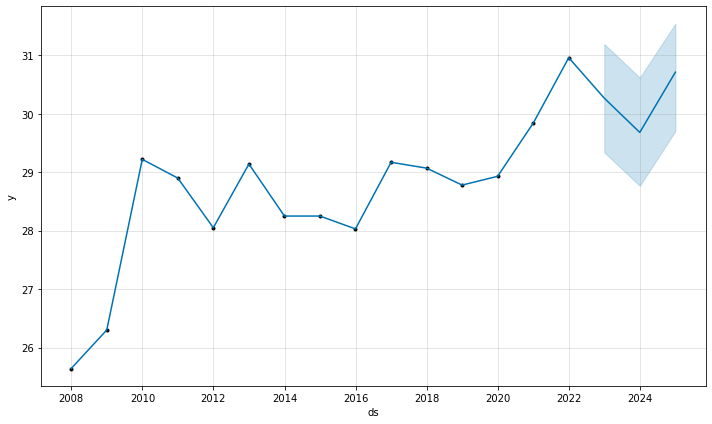

In [ ]:
df_perc = df_perc.rename(columns={'y':'yhat'})
data = pd.concat([df_perc, forecast])
fig1 = m.plot(data)